# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: 

In [41]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [42]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [43]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

In [44]:
import matplotlib.pyplot as plt


### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [45]:
# Seleccionar las columnas de Año y Nacimientos
seleccion = ['Año', 'Nacimientos']
df[seleccion].head()

df[['Año', 'Nacimientos']].head()



,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157


In [46]:
# Filtrar datos desde el año 2010
filtro = df['Año'] >= 2010
df_filtrado = df[filtro]    

df

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [47]:
# total_nacimientos
total_nacimientos = df['Nacimientos'].sum()
print(total_nacimientos)
# total_defunciones 
total_defunciones = df['Defunciones'].sum()
print(total_defunciones)

4846207
975501


**2\. Añadir una nueva columna con el saldo poblacional :**

In [48]:
#Saldo Poblacional
df['Saldo_Poblacional'] = df['Nacimientos'] - df['Defunciones']
df.head()


,Año,Nacimientos,Defunciones,Saldo_Poblacional
0,1950,37248,9769,27479
1,1951,39239,9631,29608
2,1952,42461,9902,32559
3,1953,42817,10312,32505
4,1954,48157,9713,38444


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

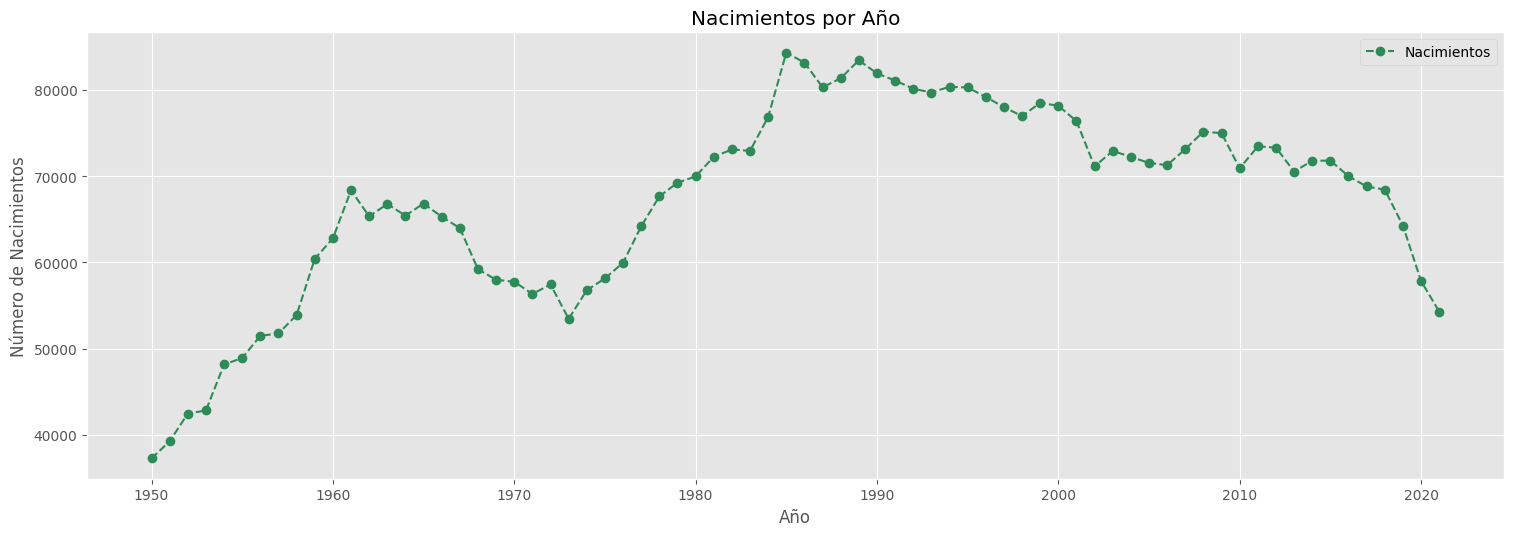

In [49]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (15, 5)

df['Año']
df['Nacimientos']
df['Defunciones']

fig, ax = plt.subplots()
ax.plot(df['Año'], df['Nacimientos'], marker="o", color="seagreen", label="Nacimientos", linestyle='--')
plt.tight_layout()

ax.set_xlabel("Año")
ax.set_ylabel("Número de Nacimientos")
ax.set_title("Nacimientos por Año")
ax.legend()

plt.show()

### **Gráfico de barras: Comparación de nacimientos y defunciones**

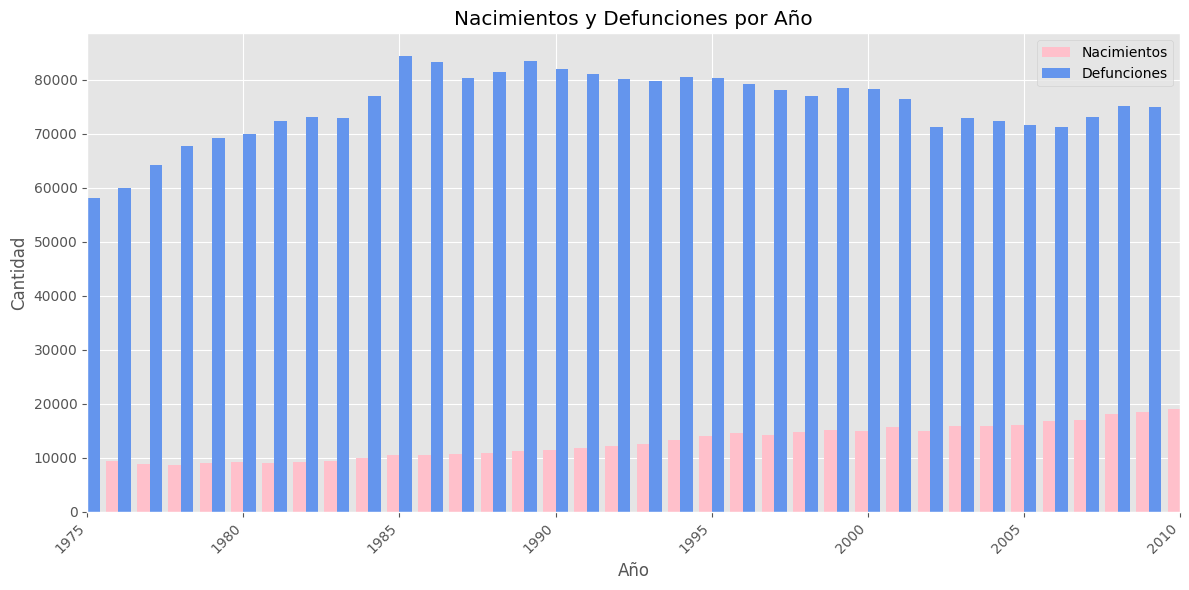

In [50]:
# Crear gráfico de barras
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 6)

df["Año"]
df["Nacimientos"]
df["Defunciones"]

fig, ax = plt.subplots()

indices = np.arange(len(df["Año"]))
ancho = 0.4

ax.bar(indices-ancho/2, df["Defunciones"], width=ancho, label="Nacimientos", color="pink") # Cambiar color a "pink"
ax.bar(indices+ancho/2, df["Nacimientos"],  width=ancho, label="Defunciones", color="cornflowerblue") # Cambiar color a "cornflowerblue"

# Configurar etiquetas y título
ax.set_xticks(indices[::5], df["Año"][::5], rotation=45, ha="right")

ax.set_xlabel("Año")
ax.set_ylabel("Cantidad")
ax.set_title("Nacimientos y Defunciones por Año")
ax.legend() 

ax.set_xlim(25, 60) # Ajustar los límites del eje x por los indices (0,71)

plt.tight_layout()
plt.show()

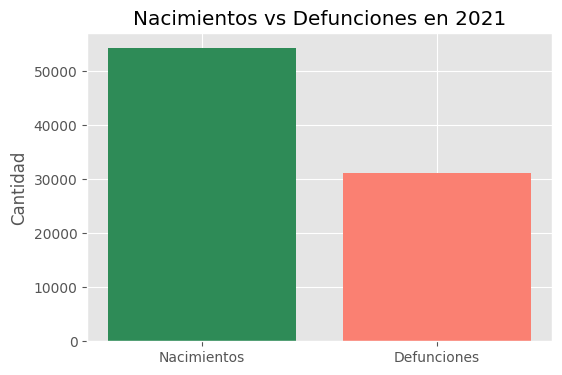

In [56]:
# Filtrar datos del último año
filtro = df['Año'] == df['Año'].max()
ultimo_anio = df[filtro]

# Crear gráfico de barras
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (6, 4)

fig, ax = plt.subplots()
ax.bar(['Nacimientos', 'Defunciones'], [ultimo_anio['Nacimientos'].values[0], ultimo_anio['Defunciones'].values[0]], color=['seagreen', 'salmon'])
ax.set_ylabel("Cantidad")
ax.set_title(f"Nacimientos vs Defunciones en {ultimo_anio['Año'].values[0]}")
plt.show()          

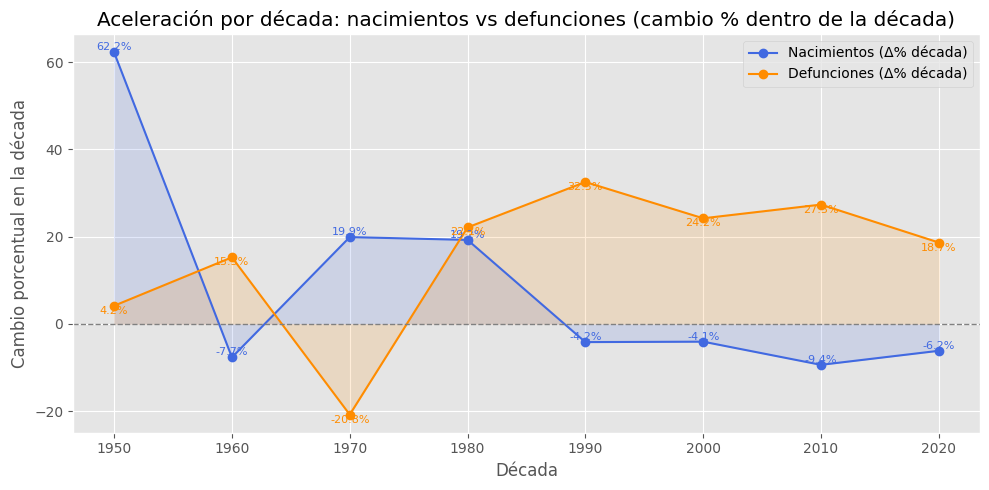

In [59]:
df_decada = df.copy()
df_decada["Década"] = (df_decada["Año"] // 10) * 10


# Resumen por década: promedio, primer valor y último valor de la década
resumen_decada = (
df_decada
.groupby("Década")[["Nacimientos", "Defunciones"]]
.agg(["mean", "first", "last"])
)


# Cambio porcentual por década (primer año vs último año de la década)
for columna in ["Nacimientos", "Defunciones"]:
    resumen_decada[(columna, "cambio_pct")] = (
    (resumen_decada[(columna, "last")] - resumen_decada[(columna, "first")])
    / resumen_decada[(columna, "first")]
    * 100
    )


# Extraemos datos para el gráfico
decadas = resumen_decada.index.astype(int)
nac_cambio_pct = resumen_decada[("Nacimientos", "cambio_pct")]
def_cambio_pct = resumen_decada[("Defunciones", "cambio_pct")]


# Gráfico de aceleración por década
plt.figure(figsize=(10, 5))


plt.plot(
    decadas,
    nac_cambio_pct,
    marker="o",
    color="royalblue",
    label="Nacimientos (Δ% década)"
)


plt.plot(
decadas,
def_cambio_pct,
marker="o",
color="darkorange",
label="Defunciones (Δ% década)"
)


# Relleno para resaltar zonas positivas/negativas
plt.fill_between(decadas, nac_cambio_pct, 0, color="royalblue", alpha=0.15)
plt.fill_between(decadas, def_cambio_pct, 0, color="darkorange", alpha=0.15)


# Etiquetas de porcentaje en cada punto
for x, y in zip(decadas, nac_cambio_pct):
    plt.text(x, y, f"{y:.1f}%", ha="center", va="bottom", fontsize=8, color="royalblue")


for x, y in zip(decadas, def_cambio_pct):
    plt.text(x, y, f"{y:.1f}%", ha="center", va="top", fontsize=8, color="darkorange")


# Línea horizontal en 0 para separar aumento/disminución
plt.axhline(0, color="gray", ls="--", lw=1)


plt.title("Aceleración por década: nacimientos vs defunciones (cambio % dentro de la década)")
plt.xlabel("Década")
plt.ylabel("Cambio porcentual en la década")
plt.legend()
plt.tight_layout()
plt.show()



### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [52]:
#


2. **Calcular promedios:**

In [53]:
#

3. **Graficar:**

In [54]:
#
